# **Classification of Lyrics by Music Genres using Natural Language Processing and Machine Learning Techniques**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# **Preprocessing and splitting the dataset**

In [ ]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Read the training and test data from CSV files
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Preprocess the lyric data using NLTK
stop_words = set(stopwords.words('english'))  # removing stopwords
lemmatizer = WordNetLemmatizer()  # reducing inflected words to their root form

# Tokenizing the lyrics in our training data
def preprocess_text(text):
    text = re.sub(r'[,\[\](){}]', '', text) #remove certain special characters
    tokens = word_tokenize(text.lower())
    lemmatized_tokens = []
    for token in tokens:
        if token.isalpha() and token not in stop_words:  # ensures that only alphabetical tokens that are not stopwords are lemmatized
            lemmatized_token = lemmatizer.lemmatize(token)
            lemmatized_tokens.append(lemmatized_token)  # appended to lemmatized_tokens
    return ' '.join(tokens)  # creates each preprocessed lyric as a string

# Preprocessing our training and test data sets
train_data['lyric'] = train_data['lyric'].apply(preprocess_text)
test_data['lyric'] = test_data['lyric'].apply(preprocess_text)

# Split the training data into lyrics (features) and classes (labels)
x_train = train_data['lyric']
y_train = train_data['class']


# **Using a CountVectorizer with n-grams to vectorize the training data**

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1, 2))
x_train_vectorized = vectorizer.fit_transform(x_train)


# **Using a Logistic Regression classifier to classify our data**

In [ ]:
classifier = LogisticRegression(max_iter=1000, n_jobs=-1, C=5)
classifier.fit(x_train_vectorized, y_train)


LogisticRegression(C=5, max_iter=1000, n_jobs=-1)

# **Using a Naive Bayes classifier to classify our data**

In [ ]:
#uncomment for testing purposes

#classifier = MultinomialNB()
#classifier.fit(x_train_vectorized, y_train)

# **Using a RandomForest classifier to classify our data**

In [ ]:
#uncomment for testing purposes

#classifier = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=42)
#classifier.fit(x_train_vectorized, y_train)

In [ ]:
#Use the trained model to classify the lyrics in the test data
x_test = test_data['lyric']
x_test_vectorized = vectorizer.transform(x_test)
y_pred = classifier.predict(x_test_vectorized)

# **Evaluating the model**

              precision    recall  f1-score   support

           0       0.77      0.84      0.81       101
           1       0.82      0.75      0.79       100

    accuracy                           0.80       201
   macro avg       0.80      0.80      0.80       201
weighted avg       0.80      0.80      0.80       201



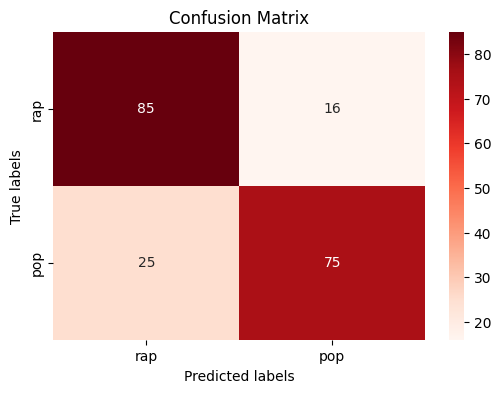

In [ ]:
#evaluate the performance of the model
test_data['predicted_class'] = y_pred
test_data.to_csv("test_with_predictions.csv", index=False)

sample = pd.read_csv("sample2.csv")

#merge the predicted classes based on 'id'
test_results = pd.merge(test_data, sample, on='id')

#calculate classification report
print(classification_report(test_results['class'], test_results['predicted_class']))

class_names = ['rap', 'pop']

#Create confusion matrix
cm = confusion_matrix(test_results['class'], test_results['predicted_class'])

#Creating a visual representation of confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()